# Week 3 Assignment

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import Image
%matplotlib inline 

##  Combining DataFrames with Pandas

### Challenge 1: Combine Data

In [2]:
# read tables
surveys2001_df = pd.read_csv("survey2001.csv", index_col=0, keep_default_na=False, na_values=[""])
surveys2002_df = pd.read_csv("survey2002.csv", index_col=0, keep_default_na=False, na_values=[""])

In [3]:
# conbine two tables
surveys_df = pd.concat([surveys2001_df, surveys2002_df], axis=0, sort=False)
# reset index
surveys_df = surveys_df.reset_index(drop=True)

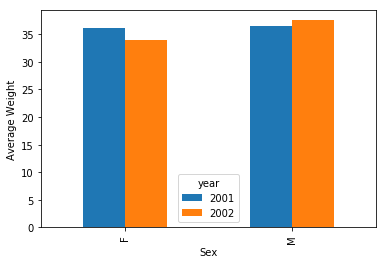

In [4]:
# group table by sex & year and calculate average weight by year
# grouped_df = surveys_df.groupby('sex')
# groupedF_Year_df = grouped_df.get_group('F').groupby('year')['wgt'].mean()
# groupedM_Year_df = grouped_df.get_group('M').groupby('year')['wgt'].mean()
grouped_df = surveys_df.groupby(['sex','year'])['wgt'].mean().unstack()
# plot figure
grouped_df.plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Average Weight")
plt.show()

In [5]:
# write to file
grouped_df.to_csv('results.csv', index=False)

### Challenge 2: Distributions

In [6]:
# read tables
surveys_df = pd.read_csv("surveys.csv", keep_default_na=False, na_values=[""])
species_df = pd.read_csv("species.csv", keep_default_na=False, na_values=[""])

In [7]:
# merage tables on species id
# merged_df = pd.merge(left=surveys_df, right=species_df, left_on='species_id', right_on='species_id')
merged_df = pd.merge(left=surveys_df, right=species_df, how='left', on='species_id')

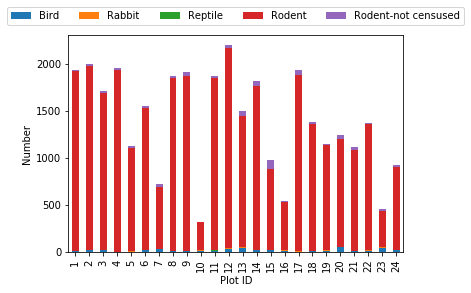

In [8]:
# plot distribution of taxa by plot id 
merged_df.groupby(["plot_id", "taxa"]).count()["record_id"].unstack().plot(kind='bar', stacked=True) 
plt.xlabel("Plot ID")
plt.ylabel("Number")
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.15))
plt.show()

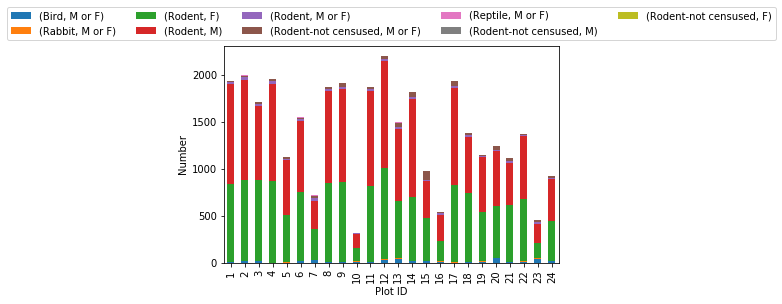

In [9]:
# replace missing values on 'Sex' with 'M or F'
merged_df.loc[merged_df["sex"].isnull(), "sex"] = 'M or F'
# plot distribution of taxa & sex by plot id
merged_df.groupby(["plot_id", "taxa", "sex"]).count()["record_id"].unstack(level=[1,2]).plot(kind='bar', stacked=True) 
plt.xlabel("Plot ID")
plt.ylabel("Number")
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.2))
plt.show()

### Challenge 3: Diversity Index

In [10]:
# read table
plots_df = pd.read_csv("plots.csv", keep_default_na=False, na_values=[""])
#  summarize the number of plots by plot type
#plots_df.groupby(["plot_type"])["plot_id"].nunique()
plots_df.groupby(["plot_type"]).count().unstack()

         plot_type                
plot_id  Control                      8
         Long-term Krat Exclosure     4
         Rodent Exclosure             6
         Short-term Krat Exclosure    4
         Spectab exclosure            2
dtype: int64

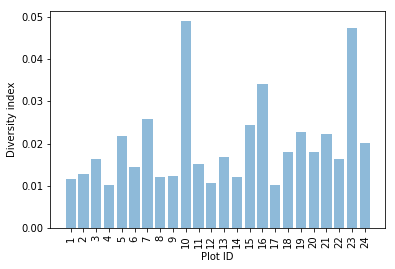

In [11]:
# calculate number of species for each plot
num_species = merged_df.groupby(["plot_id"])["species_id"].nunique()
# calculate total number of individuals for each plot
num_individuals = merged_df.groupby(["plot_id"])["record_id"].count()
# calculate biodiversity index for each plot
diversity = num_species/num_individuals
# plot Biodiversity index
plot_ID = range(min(merged_df["plot_id"]),max(merged_df["plot_id"])+1)
plt.bar(plot_ID, diversity, align='center', alpha=0.5)
plt.xticks(np.arange(min(merged_df["plot_id"]),max(merged_df["plot_id"])+1), rotation='vertical')
plt.ylabel('Diversity index')
plt.xlabel('Plot ID')
plt.show()

## Data Workflows and Automation

### Challenge 1: Loops

In [12]:
# will get error message if 'pass' is not included
animals = ['lion', 'tiger', 'crocodile', 'vulture', 'hippo']
for creature in animals:
    #pass

SyntaxError: unexpected EOF while parsing (<ipython-input-12-a76416f8a6ba>, line 4)

In [15]:
# animals are separated by commas, not new lines
animals = ['lion', 'tiger', 'crocodile', 'vulture', 'hippo']
for creature in animals:
    print(creature + ',', end="")

lion,tiger,crocodile,vulture,hippo,

### Challenge 2: Modifying loops

In [16]:
# load the data into a DataFrame
surveys_df = pd.read_csv("surveys.csv", keep_default_na=False, na_values=[""])
# drop null values from the yearly files
for year in surveys_df['year'].unique():
    # select data
    surveys_year = surveys_df[surveys_df.year == year].dropna()
    # gengerate file name
    filename ='surveys' + str(year) + '.csv'
    # write data to file
    surveys_year.to_csv(filename)

In [17]:
# get first & last year
first_year = min(surveys_df['year'].unique())
last_year = max(surveys_df['year'].unique())
# generate data files for only every 5th year
for year in range(first_year, last_year+1, 5):
    # select data
    surveys_year = surveys_df[surveys_df.year == year].dropna()
    # gengerate file name
    filename ='surveys_' + str(year) + '.csv'
    # write data to file
    surveys_year.to_csv(filename)

In [18]:
# replace missing values on 'species_id' with 'Unknown'
surveys_df.loc[surveys_df["species_id"].isnull(), "species_id"] = 'Unknown'
# splitting out the data by species
for species in surveys_df['species_id'].unique():
    # select data
    surveys_species = surveys_df[surveys_df.species_id == species].dropna()
    # gengerate file name
    filename ='surveys_' + species + '.csv'
    # write data to file
    surveys_species.to_csv(filename)

### Challenge 3: Functions

In [19]:
# define a function
def this_is_the_function_name(input_argument1, input_argument2):

    # The body of the function is indented
    # This function prints the two arguments to screen
    print('The function arguments are:', input_argument1, input_argument2, '(this is done inside the function!)')

    # And returns their product
    return input_argument1 * input_argument2

In [20]:
product_of_inputs = this_is_the_function_name(10,100)
print('Their product is:', product_of_inputs, '(this is done outside the function!)')

The function arguments are: 10 100 (this is done inside the function!)
Their product is: 1000 (this is done outside the function!)


In [21]:
# give wrong number of arguments 
product_of_inputs = this_is_the_function_name(10,100,1000)

TypeError: this_is_the_function_name() takes 2 positional arguments but 3 were given

In [22]:
# re-define a function
def this_is_the_function_name(input_argument1, input_argument2):
    
    # new variable
    test = 11111
    
    print('New variable inside function:', test)

    # The body of the function is indented
    # This function prints the two arguments to screen
    print('The function arguments are:', input_argument1, input_argument2, '(this is done inside the function!)')

    # And returns their product
    return input_argument1 * input_argument2

In [23]:
# variable inside the function lives inside function
product_of_inputs = this_is_the_function_name(10,100)
print('New variable outside function:', test)

New variable inside function: 11111
The function arguments are: 10 100 (this is done inside the function!)


NameError: name 'test' is not defined

In [24]:
# the global variable will not change even if the value of the local variable has been changed inside the function
test = 22222
product_of_inputs = this_is_the_function_name(10,100)
print('New variable outside function:', test)

New variable inside function: 11111
The function arguments are: 10 100 (this is done inside the function!)
New variable outside function: 22222


### Challenge 4: More functions

In [25]:
import os

In [26]:
# add two arguments to the functions 
def one_year_csv_writer(this_year, all_data, path, name):
    
    # Select data for the year
    surveys_year = all_data[all_data.year == this_year]

    # Write the new DataFrame to a csv file
    filename = path + name + str(this_year) + '.csv'
    surveys_year.to_csv(filename)
# save file to the location
one_year_csv_writer(1997, surveys_df, './data/', 'function_surveys')

In [27]:
# re-define yearly function
def yearly_data_csv_writer(start_year, end_year, all_data, path, name):

    # "end_year" is the last year of data we want to pull, so we loop to end_year+1
    for year in range(start_year, end_year+1):
        one_year_csv_writer(year, all_data, path, name)
# save file to the location
yearly_data_csv_writer(1998, 1998, surveys_df, './data/', 'function_surveys')

In [28]:
# make functions return a list of the files they have written
def one_year_csv_writer(this_year, all_data, path, name):
    # Select data for the year
    surveys_year = all_data[all_data.year == this_year]
    # Write the new DataFrame to a csv file
    filename = path + name + str(this_year) + '.csv'
    surveys_year.to_csv(filename)
    return name + str(this_year) + '.csv'

# re-define yearly function
def yearly_data_csv_writer(start_year, end_year, all_data, path, name):
    filelist = []
    # "end_year" is the last year of data we want to pull, so we loop to end_year+1
    for year in range(start_year, end_year+1):
        filelist.append(one_year_csv_writer(year, all_data, path, name))
    print('The total ' + str(len(filelist)) + ' files have been saved into path:' + path)
    print('The complete file list:')
    for file in filelist:
        print(file)
yearly_data_csv_writer(1990, 1998, surveys_df, './data/', 'function_surveys')

The total 9 files have been saved into path:./data/
The complete file list:
function_surveys1990.csv
function_surveys1991.csv
function_surveys1992.csv
function_surveys1993.csv
function_surveys1994.csv
function_surveys1995.csv
function_surveys1996.csv
function_surveys1997.csv
function_surveys1998.csv


### Challenge 5:  Variables

In [29]:
test = None
type(test)

NoneType

In [30]:
def yearly_data_arg_test(all_data, start_year = None, end_year = None):
    """
    Modified from yearly_data_csv_writer to test default argument values!

    start_year --- the first year of data we want --- default: None - check all_data
    end_year --- the last year of data we want --- default: None - check all_data
    all_data --- DataFrame with multi-year data
    """

    if start_year is None:
        start_year = min(all_data.year)
    if end_year is None:
        end_year = max(all_data.year)

    return start_year, end_year

In [31]:
yearly_data_arg_test(surveys_df, end_year=2001)

(1977, 2001)

### Challenge 6: Modifying functions


In [32]:
# rewrite the one_year_csv_writer and yearly_data_csv_writer functions 
# to have keyword arguments with default values
def one_year_csv_writer(this_year, all_data, path='./data/', name='surveys'):
    # Select data for the year
    surveys_year = all_data[all_data.year == this_year]
    # Write the new DataFrame to a csv file
    filename = path + name + str(this_year) + '.csv'
    surveys_year.to_csv(filename)
    
def yearly_data_csv_writer(start_year, end_year, all_data, path='./data/', name='surveys'):
    # "end_year" is the last year of data we want to pull, so we loop to end_year+1
    for year in range(start_year, end_year+1):
        one_year_csv_writer(year, all_data, path, name)

In [33]:
# add addtional check for no data
def one_year_csv_writer(this_year, all_data, path='./data/', name='surveys'):
    # Select data for the year
    surveys_year = all_data[all_data.year == this_year]
    if len(surveys_year>0):
        # Write the new DataFrame to a csv file
        filename = path + name + str(this_year) + '.csv'
        surveys_year.to_csv(filename)
    else:
        print('No data for year ' + str(this_year))
one_year_csv_writer(2018, surveys_df)

No data for year 2018


In [34]:
# add addtional check for directory
def one_year_csv_writer(this_year, all_data, path='./', dirname = 'data', name='surveys'):
    # Select data for the year
    surveys_year = all_data[all_data.year == this_year]
    if len(surveys_year>0):
        # Write the new DataFrame to a csv file
        filename = path + dirname + '/' + name + str(this_year) + '.csv'
        if dirname in os.listdir('.'):
            print('Processed directory exists')
        else:
            os.mkdir(dirname)
            print('Processed directory created')
        # save file to the location    
        surveys_year.to_csv(filename)
    else:
        print('No data for year ' + str(this_year))
one_year_csv_writer(2000, surveys_df, dirname = 'NEW')

Processed directory created


In [35]:
def yearly_data_csv_writer(start_year, end_year, all_data, path='./data/', name='surveys'):
    # "end_year" is the last year of data we want to pull, so we loop to end_year+1
    for year in range(start_year, end_year+1):
        one_year_csv_writer(year, all_data, path, name)

In [36]:
# create a loop to process your data, that begins at the earliest year and ends at the latest year using that list
def one_year_csv_writer(this_year, all_data, path='./data/', name='surveys'):
    # Select data for the year
    surveys_year = all_data[all_data.year == this_year]
    # Write the new DataFrame to a csv file
    filename = path + name + str(this_year) + '.csv'
    surveys_year.to_csv(filename)
    
def yearly_data_csv_writer(all_data, path='./data/', name='surveys'):
    all_years = all_data['year'].unique()
    # "end_year" is the last year of data we want to pull, so we loop to end_year+1
    for year in all_years:
        one_year_csv_writer(year, all_data, path, name)
        
yearly_data_csv_writer(surveys_df)

##  Data Ingest and Visualization - Matplotlib and Pandas

### Challenge 1:  Lots of plots

In [37]:
# load data
data_df = pd.read_csv('bouldercreek_09_2013.txt', sep='\t', keep_default_na=False, na_values=[""])
# conver string to datetime
data_df['datetime'] = pd.to_datetime(data_df['datetime'])

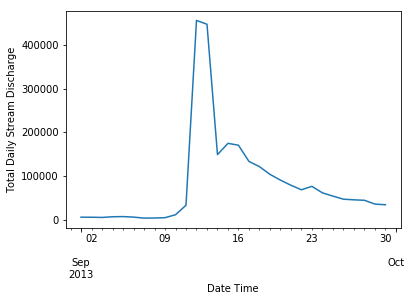

In [38]:
# calculate stream discharge by day
daily = data_df.groupby(pd.Grouper(key='datetime', freq='D'))['04_00060'].sum()
# plot data
daily.plot()
plt.xlabel("Date Time")
plt.ylabel("Total Daily Stream Discharge")
plt.show()

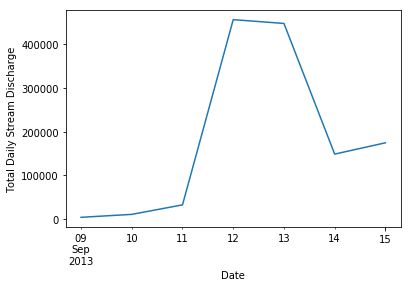

In [40]:
# select data for the week of the 2013 Front Range flood (September 9 through 15)
sub_data_df = data_df[(data_df['datetime'] > '2013-09-09') & (data_df['datetime'] < '2013-09-16')]
# calculate stream discharge by day
week_df = sub_data_df.groupby(pd.Grouper(key='datetime', freq='D'))['04_00060'].sum()
# plot data
week_df.plot()
plt.xlabel("Date")
plt.ylabel("Total Daily Stream Discharge")
plt.show()

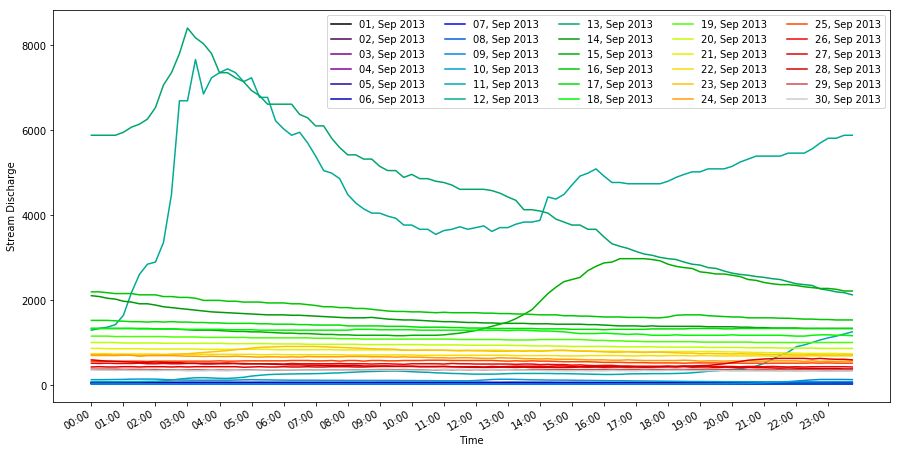

In [41]:
import datetime

# generate date index
dateIndex = pd.date_range('2013-09-01', periods=31, freq='D')
# generate time index
timeIndex = pd.date_range('00:00:00', periods=96, freq='30min')
# generate x
x = [datetime.time(i, j, 0, 0) for i in range(24) for j in range(0,60,15)]
# generate ticks
ticks = [datetime.time(i, 0, 0, 0) for i in range(0,24,1)]
# plot figure
plt.figure(figsize=(15,8))
# set color map
colormap = plt.cm.nipy_spectral
c = [colormap(i) for i in np.linspace(0, 1, 30)]

for n in range(30):
    sub_data_df = data_df[(data_df['datetime'] >= dateIndex[n]) & (data_df['datetime'] < dateIndex[n+1])]
    plt.plot(x,sub_data_df['04_00060'], color=c[n], label=dateIndex[n].strftime('%d, %b %Y'))

plt.xticks(ticks,rotation='vertical')
plt.gcf().autofmt_xdate()
plt.xlabel("Time")
plt.ylabel("Stream Discharge")
plt.legend(loc='upper right', ncol=5)
plt.show()

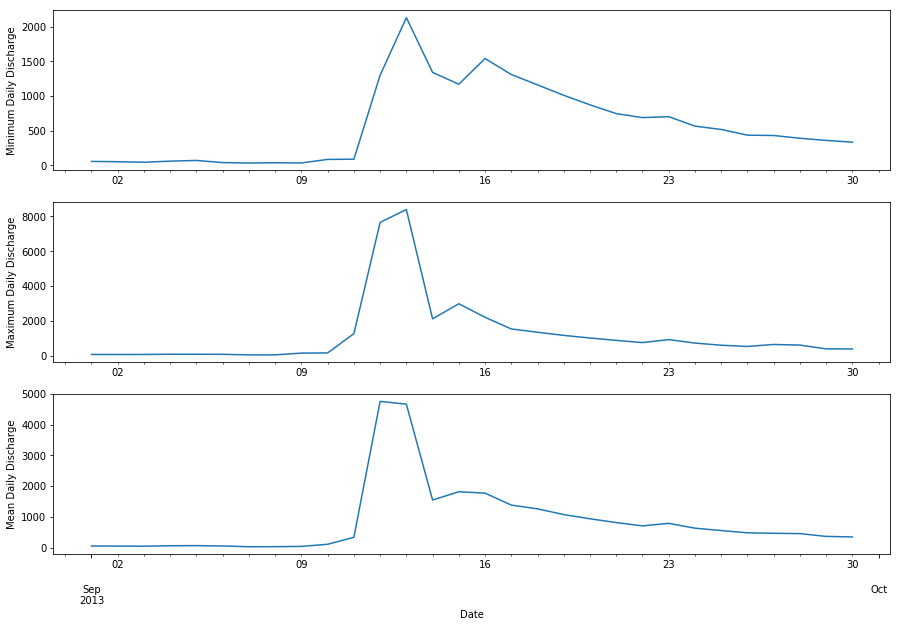

In [42]:
# calculate minimum, maximum, and mean daily discharge
data = []
data.append(data_df.groupby(pd.Grouper(key='datetime', freq='D'))['04_00060'].min())
data.append(data_df.groupby(pd.Grouper(key='datetime', freq='D'))['04_00060'].max())
data.append(data_df.groupby(pd.Grouper(key='datetime', freq='D'))['04_00060'].mean())
# plot figure
ylabels = ["Minimum Daily Discharge", "Maximum Daily Discharge", "Mean Daily Discharge"]
fig, axs = plt.subplots(3, 1, figsize=(15,10))
for ylabel, ax in zip(ylabels, axs):
    data[ylabels.index(ylabel)].plot(ax=ax, legend=False)
    ax.set_ylabel(ylabel)
    if not ax.is_last_row():
        ax.set_xticks([])
        ax.set_xlabel("")
plt.xlabel("Date")
plt.show()